In [104]:
import pandas as pd
import numpy as np
from scipy import stats

### Loading Data

In [105]:
covid_data_path = "../../data/time_series_covid19_deaths_US.csv"

In [106]:
covid_data_df = pd.read_csv(covid_data_path)

In [107]:
covid_data_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,115,117,122,122,123,124,124,125,126,126
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,6,6,6,6,6,6,6,6,6,6


In [108]:
list(covid_data_df.columns)

['UID',
 'iso2',
 'iso3',
 'code3',
 'FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Lat',
 'Long_',
 'Combined_Key',
 'Population',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 

In [109]:
covid_data_df.Combined_Key.head()

0              American Samoa, US
1                        Guam, US
2    Northern Mariana Islands, US
3                 Puerto Rico, US
4              Virgin Islands, US
Name: Combined_Key, dtype: object

In [110]:
num_samples = len(covid_data_df)

### Detecting Duplicates

In [111]:
duplicated_all_columns = covid_data_df.duplicated(subset=None, keep='first')

In [112]:
duplicated_all_columns.sum()

0

In [113]:
duplicated_UID = covid_data_df.duplicated(subset='UID')
duplicated_UID.sum()

0

### 60 days data + removing rows with number of deaths < 100

In [114]:
index = [11] + [i for i in range(71, 132)]
print(index)
df_60_days = covid_data_df.iloc[:,index]

[11, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]


In [115]:
df_60_days.head()

,Population,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20
0,55641,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,164229,0,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
2,55144,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,2933408,1,1,2,2,2,2,3,3,3,...,113,114,115,117,122,122,123,124,124,125
4,107268,0,0,0,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6


In [116]:
df_60_days.iloc[:,1:].head()

,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
2,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,1,1,2,2,2,2,3,3,3,6,...,113,114,115,117,122,122,123,124,124,125
4,0,0,0,0,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6


In [117]:
df_60_days = df_60_days[df_60_days.iloc[:, 1:].sum(axis=1)>=300]
df_60_days = df_60_days[df_60_days.iloc[:, 0]>0]
print(len(df_60_days))
df_60_days.head()

527


,Population,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20
3,2933408,1,1,2,2,2,2,3,3,3,...,113,114,115,117,122,122,123,124,124,125
13,33254,0,0,0,0,0,0,0,0,3,...,21,21,22,22,22,22,22,22,22,23
32,102268,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
41,658573,0,0,0,0,0,0,0,0,0,...,61,62,64,69,71,73,74,74,78,83
45,164542,0,0,0,0,0,0,0,0,2,...,30,30,30,30,31,31,31,31,31,32


In [118]:
df_60_days_pop = df_60_days
df_60_days = df_60_days.iloc[:,1:]

In [119]:
df_sum = df_60_days.sum(axis=1).sort_values()
df_sum.head(10)

1920    301
3116    301
547     302
2248    303
232     304
2234    305
638     305
1411    305
1484    306
351     307
dtype: int64

In [120]:
# population
df_60_days_pop.iloc[:,0].sort_values().head()

511      6778
526      8531
1484     8630
547      8635
440     10190
Name: Population, dtype: int64

### Plotting samples

In [121]:
import matplotlib.pyplot as plt

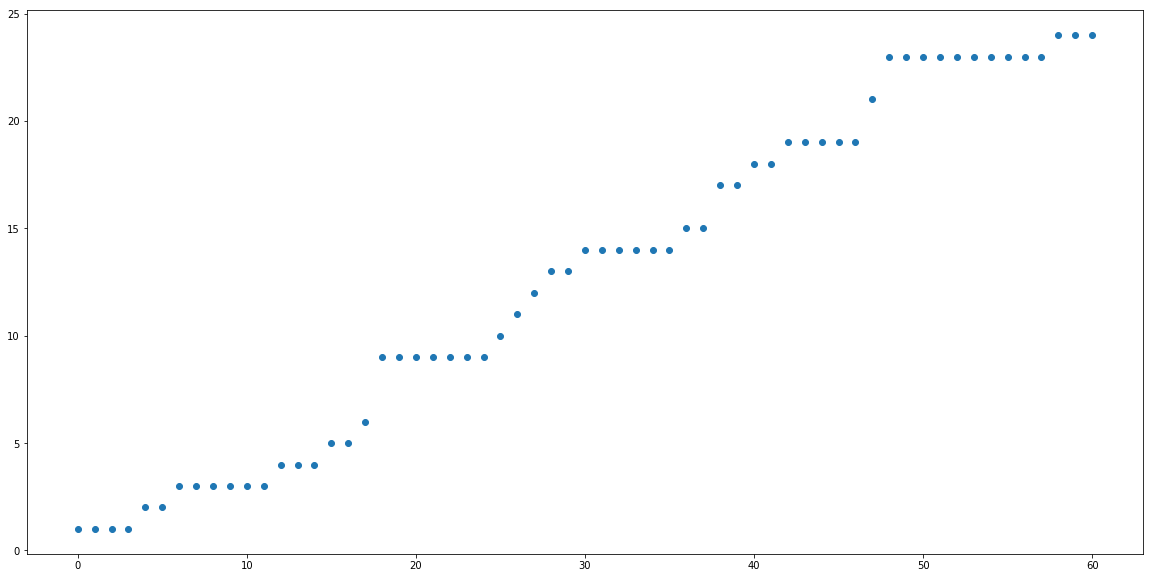

In [122]:
random_sample = np.random.randint(0, len(df_60_days))
#print(df_60_days.iloc[random_sample,:])
plt.figure(figsize=(20, 10))
plt.scatter(x=range(61), y=df_60_days.iloc[random_sample,:])

In [123]:
### plot for small number of deaths
df_low_death = df_60_days.sum(axis=1).sort_values().iloc[:10]
list_ind = list(df_low_death.index)
list_ind

[1920, 3116, 547, 2248, 232, 2234, 638, 1411, 1484, 351]

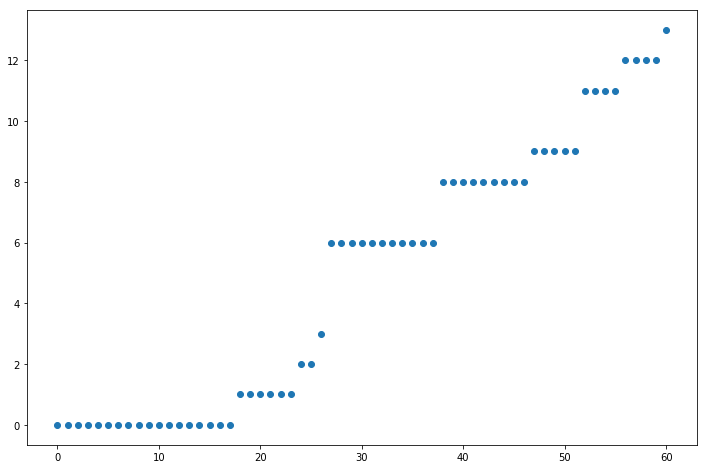

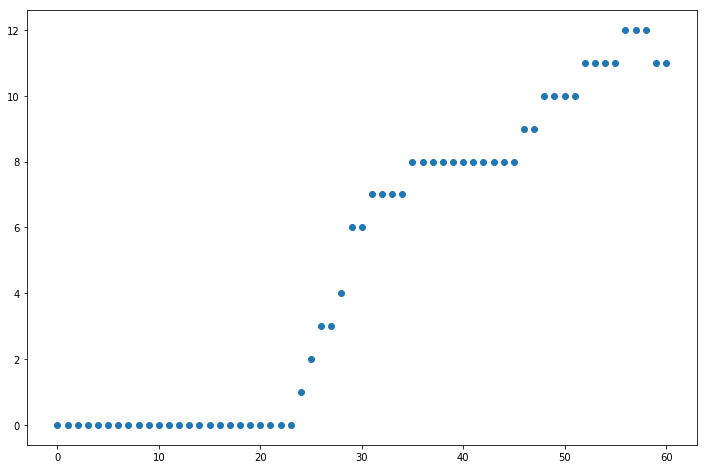

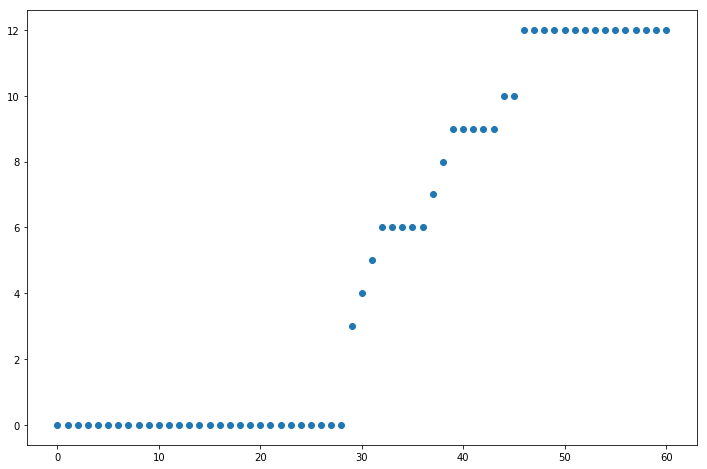

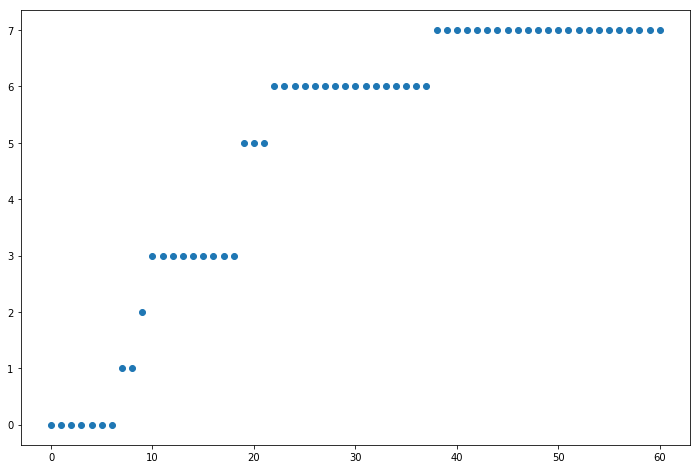

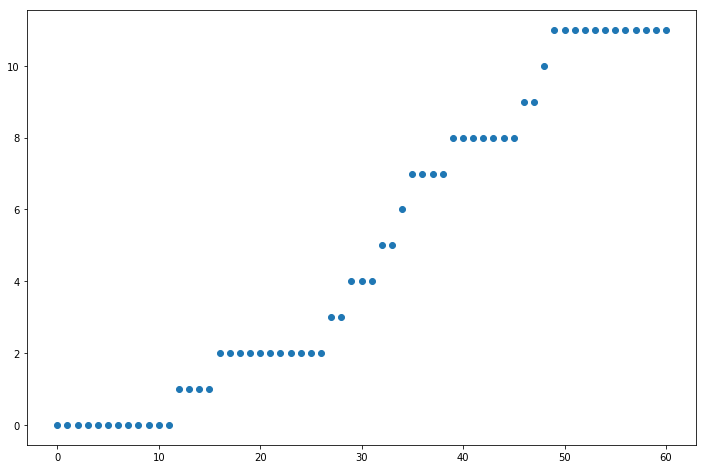

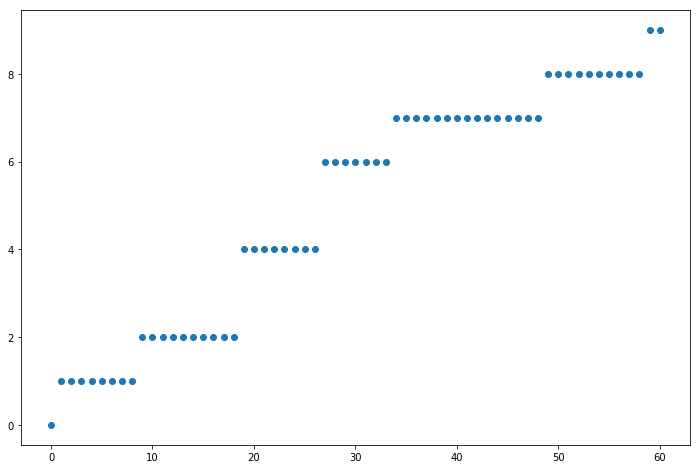

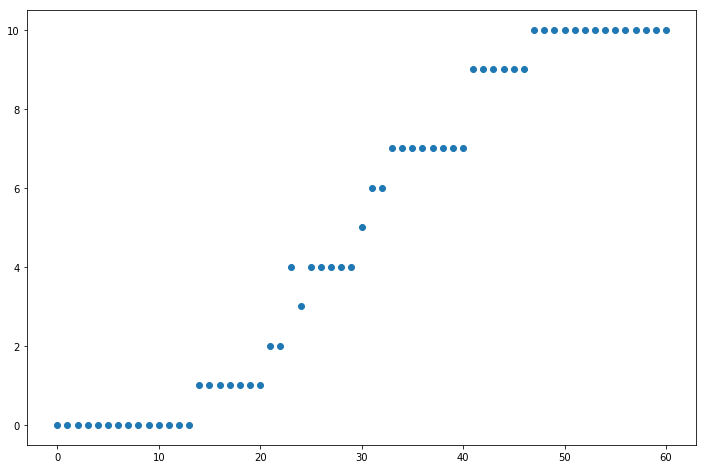

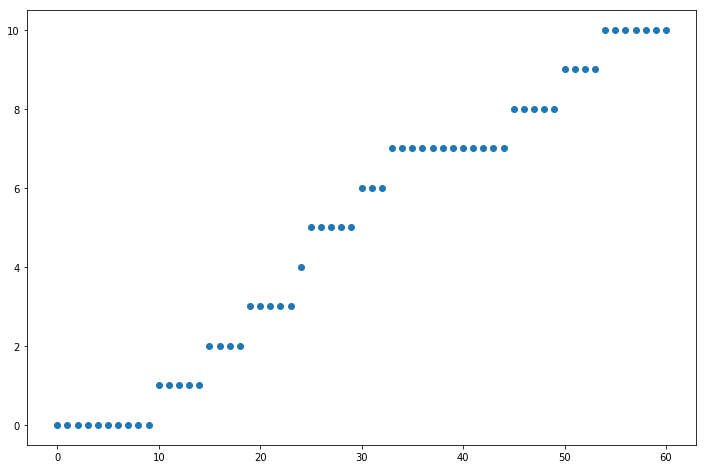

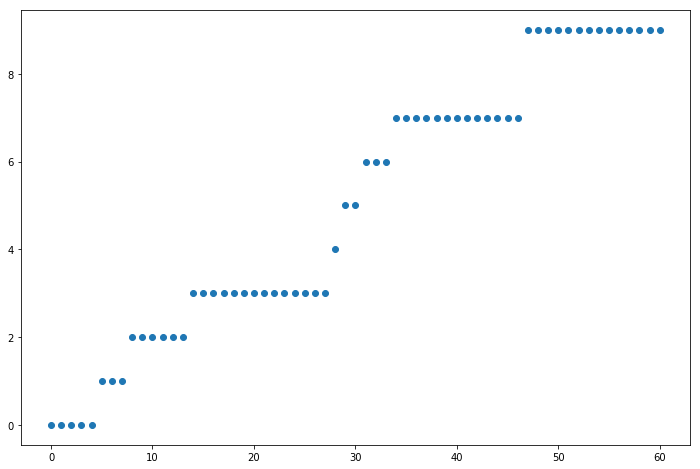

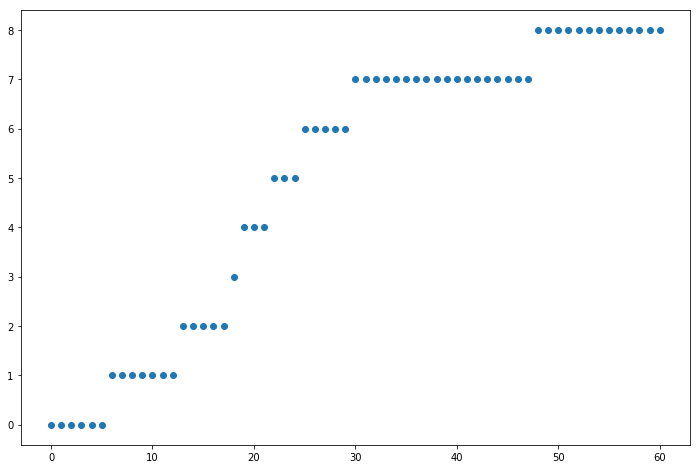

In [124]:
for i in list_ind: 
    plt.figure(figsize=(12, 8))
    plt.scatter(x=range(61), y=df_60_days.loc[i,:])

### Detecting outliers

In [125]:
z = np.abs(stats.zscore(df_60_days, axis=1))

In [126]:
z.shape

(527, 61)

In [127]:
outliers = np.where((z > 6))

In [128]:
outliers

(array([], dtype=int64), array([], dtype=int64))

In [129]:
print(len(df_60_days))
print(len(df_60_days_pop))

527
527


### rescaling using the population

In [130]:
scale_fact = df_60_days_pop['Population']/1e2
scale_fact.head()

3     29334.08
13      332.54
32     1022.68
41     6585.73
45     1645.42
Name: Population, dtype: float64

In [131]:
df_scaled = np.zeros((df_60_days.shape[0],df_60_days.shape[1]))
for j in range(df_60_days.shape[1]):
    df_scaled[:,j] = df_60_days.values[:,j]/scale_fact

In [132]:
df_scaled[0]

array([3.40900413e-05, 3.40900413e-05, 6.81800827e-05, 6.81800827e-05,
       6.81800827e-05, 6.81800827e-05, 1.02270124e-04, 1.02270124e-04,
       1.02270124e-04, 2.04540248e-04, 2.72720331e-04, 3.74990455e-04,
       4.09080496e-04, 5.11350620e-04, 6.13620744e-04, 6.81800827e-04,
       7.15890868e-04, 7.84070951e-04, 8.18160992e-04, 1.12497136e-03,
       1.32951161e-03, 1.43178174e-03, 1.49996182e-03, 1.53405186e-03,
       1.53405186e-03, 1.73859211e-03, 1.90904232e-03, 1.97722240e-03,
       2.04540248e-03, 2.11358256e-03, 2.14767260e-03, 2.18176265e-03,
       2.14767260e-03, 2.35221285e-03, 2.62493318e-03, 2.82947343e-03,
       2.86356347e-03, 2.86356347e-03, 2.93174356e-03, 2.93174356e-03,
       3.13628380e-03, 3.20446389e-03, 3.23855393e-03, 3.30673401e-03,
       3.30673401e-03, 3.37491409e-03, 3.37491409e-03, 3.47718422e-03,
       3.64763442e-03, 3.68172447e-03, 3.78399459e-03, 3.85217467e-03,
       3.88626471e-03, 3.92035475e-03, 3.98853484e-03, 4.15898504e-03,
      

In [133]:
df_60_days.iloc[0,:]

3/21/20      1
3/22/20      1
3/23/20      2
3/24/20      2
3/25/20      2
3/26/20      2
3/27/20      3
3/28/20      3
3/29/20      3
3/30/20      6
3/31/20      8
4/1/20      11
4/2/20      12
4/3/20      15
4/4/20      18
4/5/20      20
4/6/20      21
4/7/20      23
4/8/20      24
4/9/20      33
4/10/20     39
4/11/20     42
4/12/20     44
4/13/20     45
4/14/20     45
4/15/20     51
4/16/20     56
4/17/20     58
4/18/20     60
4/19/20     62
          ... 
4/21/20     64
4/22/20     63
4/23/20     69
4/24/20     77
4/25/20     83
4/26/20     84
4/27/20     84
4/28/20     86
4/29/20     86
4/30/20     92
5/1/20      94
5/2/20      95
5/3/20      97
5/4/20      97
5/5/20      99
5/6/20      99
5/7/20     102
5/8/20     107
5/9/20     108
5/10/20    111
5/11/20    113
5/12/20    114
5/13/20    115
5/14/20    117
5/15/20    122
5/16/20    122
5/17/20    123
5/18/20    124
5/19/20    124
5/20/20    125
Name: 3, Length: 61, dtype: int64

In [134]:
1 / 1642.29

0.0006089058570654391

In [135]:
2 / 1642.29

0.0012178117141308782

In [136]:
df_scaled.shape

(527, 61)

In [137]:
np.mean(df_scaled)

0.01608097663375699

In [143]:
np.max(df_scaled)

0.3098259073473001

In [138]:
arr_pop = df_60_days_pop['Population'].values
arr_pop.shape

(527,)

### saving data as a numpy_array. 

In [139]:
arr_path = "../../data/covid_preprocess_rescaled.npy"
np.save(file=arr_path, arr=df_scaled)

In [140]:
pop_path = "../../data/covid_pop.npy"
np.save(pop_path, arr_pop)

In [141]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#arr_transpose = np.transpose(final_arr)
#arr_transpose[:, 0]
#scaler = MinMaxScaler()
#arr_transpose_norm = scaler.fit_transform(arr_transpose)
#arr_transpose_norm[:,0]
#arr_transpose_norm[:,10]
#stand_scaler = StandardScaler()
#arr_transpose_norm_2 = stand_scaler.fit_transform(arr_transpose)
#arr_transpose_norm_2[:, 0]
#arr_transpose_norm_2[:, 10]

In [142]:
int(527*0.8)

421